<a href="https://colab.research.google.com/github/mohanrajmit/AGE_ESTIMATION/blob/master/imagenet_pretrained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# USAGE
# python imagenet_pretrained.py --image example_images/example_01.jpg --model vgg16

# import the necessary packages
#from tensorflow.keras.applications import ResNet50
#from tensorflow.keras.applications import InceptionV3
#from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import imagenet_utils
#from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import cv2


In [21]:
# initialize the input image shape (224x224 pixels) along with
# the pre-processing function (this might need to be changed
# based on which model we use to classify our image)
inputShape = (224, 224)
preprocess = imagenet_utils.preprocess_input


Network_vgg16 = VGG16
model_vgg16 = Network_vgg16(weights="imagenet")



In [22]:
model_vgg19 = VGG19(weights="imagenet")

574710816/574710816 [==============================] - 4s 0us/step


In [23]:
model_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [24]:
model_vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [25]:
# load the input image using the Keras helper utility while ensuring
# the image is resized to `inputShape`, the required input dimensions
# for the ImageNet pre-trained network
print("[INFO] loading and pre-processing image...")
image = load_img("/content/1.jpg", target_size=inputShape)
image = img_to_array(image)



[INFO] loading and pre-processing image...


In [26]:
image.shape

(224, 224, 3)

In [27]:
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow



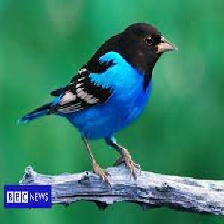

In [28]:
cv2_imshow(image)

In [29]:
# our input image is now represented as a NumPy array of shape
# (inputShape[0], inputShape[1], 3) however we need to expand the
# dimension by making the shape (1, inputShape[0], inputShape[1], 3)
# so we can pass it through thenetwork
image = np.expand_dims(image, axis=0)

# pre-process the image using the appropriate function based on the
# model that has been loaded (i.e., mean subtraction, scaling, etc.)
image = preprocess(image)



In [31]:
# classify the image
#print("[INFO] classifying image with '{}'...".format(args["model"]))
preds_vgg16 = model_vgg16.predict(image)
P = imagenet_utils.decode_predictions(preds_vgg16)



1/1 [==============================] - 1s 767ms/step


In [32]:
P

[[('n01530575', 'brambling', 0.74015415),
  ('n01531178', 'goldfinch', 0.16392927),
  ('n04604644', 'worm_fence', 0.07704371),
  ('n01558993', 'robin', 0.013913312),
  ('n01537544', 'indigo_bunting', 0.0012775094)]]

In [33]:
preds_vgg19 = model_vgg19.predict(image)
P = imagenet_utils.decode_predictions(preds_vgg19)
P

1/1 [==============================] - 1s 961ms/step


[[('n01530575', 'brambling', 0.5525832),
  ('n01531178', 'goldfinch', 0.4375205),
  ('n04604644', 'worm_fence', 0.0042114435),
  ('n01558993', 'robin', 0.004162577),
  ('n01537544', 'indigo_bunting', 0.00057369133)]]